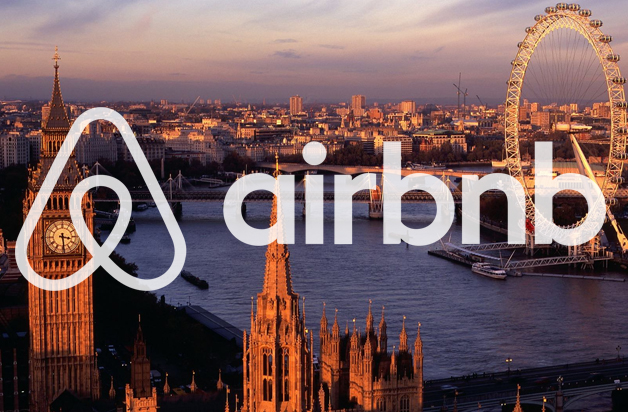

## Análise Exploratória de Dados - Airbnb Londres

Criado em 2008, o Airbnb é uma plataforma de aluguel de hospedagens que permite que qualquer pessoa disponibilize ou reserve acomodações ao redor do mundo. 

A empresa Airbnb é Open Data e disponibiliza datasets de várias cidades através do site (http://insideairbnb.com/get-the-data.html). 

Este projeto tem como objetivo analisar e mapear os dados disponibilizados pela empresa Airbnb referentes à cidade de Londres.

* ```id``` - número de id único para identificar o imóvel
* ```name``` - nome do imóvel anunciado
* ```host_id``` - número de id do proprietário (anfitrião) da propriedade
* ```host_name``` - nome do anfitrião
* ```neighbourhood_group``` - não contém nenhum valor válido
* ```neighbourhood``` - nome do bairro
* ```latitude``` - coordenada da latitude da propriedade
* ```longitude``` - coordenada da longitude da propriedade
* ```room_type``` - informa o tipo de quarto que é oferecido
* ```price``` - preço da diária do imóvel na moeda local
* ```minimum_nights``` - número mínimo de noites para reservar
* ```number_of_reviews``` - número de reviews que a propriedade possui
* ```last_review``` - data do último review
* ```reviews_per_month``` - quantidade de reviews por mês
* ```calculated_host_listings_count``` - quantidade de imóveis do mesmo anfitrião
* ```availability_365``` - número de dias de disponibilidade dentro de 365 dias
* ```number_of_reviews_ltm```- número de reviews que a propriedade teve nos últimos 12 meses
* ```license``` - licença

### 1. Bibliotecas e Carregando os dados

In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
%matplotlib inline

In [2]:
# Carregando o dataset

df = pd.read_csv('listings.csv', sep=',')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,65,1,21,2011-09-13,0.17,2,339,0,NaN
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,89,2019-08-10,0.79,1,2,0,NaN
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,43,2019-11-02,0.35,2,320,1,NaN
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364,0,NaN
4,24328,"Battersea bedroom & studio, parking, shared ga...",41759,Joe,NaN,Wandsworth,51.47119,-0.16256,Entire home/apt,200,7,93,2015-10-24,0.77,1,273,0,NaN


In [3]:
#Restringindo os dados analisados

airbnb = df[['neighbourhood','latitude','longitude','room_type','price','minimum_nights','availability_365']]
airbnb.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Islington,51.56861,-0.11270,Private room,65,1,339
1,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,2
2,Westminster,51.52195,-0.14094,Entire home/apt,307,4,320
3,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,364
4,Wandsworth,51.47119,-0.16256,Entire home/apt,200,7,273


### 2. Resumo dos dados 

In [4]:
# Medidas descritivas dos dados

airbnb.describe()

,latitude,longitude,price,minimum_nights,availability_365
count,67903.000000,67903.000000,67903.000000,67903.000000,67903.000000
mean,51.509565,-0.128377,139.984095,6.518887,100.688320
std,0.048068,0.096590,300.616065,30.049047,133.909727
min,51.295937,-0.500270,0.000000,1.000000,0.000000
25%,51.483220,-0.188715,45.000000,1.000000,0.000000
50%,51.513750,-0.125470,80.000000,2.000000,4.000000
75%,51.539650,-0.069450,142.000000,4.000000,185.000000
max,51.679980,0.288570,18012.000000,1125.000000,365.000000


Classificando as variáveis:

* ```neighbourhood``` - qualitativa nominal 
* ```latitude``` - quantitativa contínua
* ```longitude``` - quantitativa contínua
* ```room_type``` - qualitativa nominal
* ```price``` - quantitativa discreta
* ```minimum_nights``` - quantitativa discreta
* ```availability_365``` - quantitativa discreta

In [297]:
# Obtendo informações sobre o tipo das variáveis do dataset

print("\nTamanho do dataset:")
print(f'Entradas: {airbnb.shape[0]}')
print(f'Atributos: {airbnb.shape[1]}')
airbnb.dtypes


Tamanho do dataset:
Entradas: 67903
Atributos: 9


neighbourhood         object
latitude             float64
longitude            float64
room_type             object
price                  int64
minimum_nights         int64
availability_365       int64
night_grupo         category
price_grupo         category
dtype: object

In [6]:
# Verificando valores ausentes 

airbnb.isnull().sum()

neighbourhood       0
latitude            0
longitude           0
room_type           0
price               0
minimum_nights      0
availability_365    0
dtype: int64

In [65]:
# Verificando os valores distintos da variável neighbourhood

print(f'\nNº de Bairros Distintos: {airbnb.neighbourhood.unique().size} bairros')
airbnb.neighbourhood.unique()


Nº de Bairros Distintos: 33 bairros


array(['Islington', 'Kensington and Chelsea', 'Westminster',
       'Hammersmith and Fulham', 'Wandsworth', 'Barnet', 'Hounslow',
       'Richmond upon Thames', 'Haringey', 'Croydon', 'Southwark',
       'Waltham Forest', 'Brent', 'Camden', 'Newham', 'Tower Hamlets',
       'Lambeth', 'Hackney', 'Merton', 'Lewisham', 'Bromley', 'Havering',
       'Greenwich', 'Ealing', 'Enfield', 'City of London',
       'Barking and Dagenham', 'Hillingdon', 'Harrow', 'Redbridge',
       'Kingston upon Thames', 'Bexley', 'Sutton'], dtype=object)

In [67]:
# Verificando os valores distintos da variável room_type

print(f'\nNº de Acomodações Distintas: {airbnb.room_type.unique().size} tipos')
airbnb.room_type.unique()


Nº de Acomodações Distintas: 4 tipos


array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

### 3. Análise das Variáveis

#### Variável : Neighbourhood

In [9]:
# Tabela de frequência absoluta e relativa da variável neighbourhood

n_ab = airbnb.groupby('neighbourhood')['neighbourhood'].count().sort_values(ascending=False)
n_rel = ((airbnb.groupby('neighbourhood')['neighbourhood'].count())/airbnb.shape[0]).sort_values(ascending =False)
ntable = pd.DataFrame((n_ab,n_rel*100), index=['freq. abs','freq. rel (%)']).transpose().round(2)  

# Distribuição dos bairros com imóveis para alugar
print("\nDistribuição dos bairros com imóveis para alugar")
ntable


Distribuição dos bairros com imóveis para alugar


,freq. abs,freq. rel (%)
neighbourhood,,
Westminster,7230.0,10.65
Tower Hamlets,5679.0,8.36
Hackney,5178.0,7.63
Kensington and Chelsea,4788.0,7.05
Camden,4619.0,6.80
Southwark,4008.0,5.90
Islington,3928.0,5.78
Lambeth,3799.0,5.59
Wandsworth,3532.0,5.20


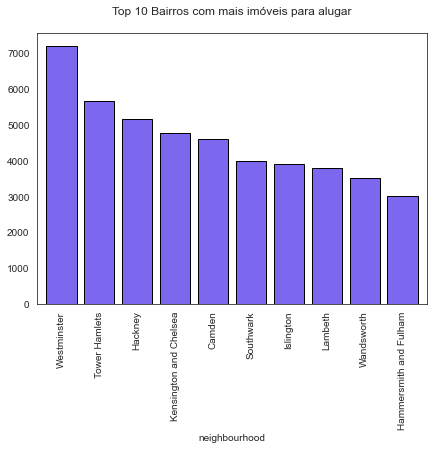

In [318]:
# Gráfico de barras

plt.figure(figsize=(7, 5))
n_ab.head(10).plot(kind='bar', width=0.8, color='mediumslateblue', edgecolor='black', title='Top 10 Bairros com mais imóveis para alugar\n');



O site Airbnb de Londres apresenta imóveis para locação em 33 diferentes bairros na cidade. O gráfico acima apresentam os Top 10 bairros com mais imóveis para alugar na cidade de Londres. 

Pode-se concluir que o Top 3 bairros da categoria neighbourhood são:

* 1º Westminster - 7230.0 imóveis (10.65%)
* 2º Tower Hamlets - 5679.0 imóveis (8.36%)
* 3º Hackney - 5178.0 imóveis (7.63%)


Pela tabela é possível concluir que o bairro Havering é o que possui menos acomodações, com	255 imóveis (0.38%).

#### Variável : Room_type

In [328]:
# Tabela de frequência absoluta e relativa da variável room_type

r_ab = airbnb.groupby('room_type')['room_type'].count().sort_values(ascending=False)
r_rel = ((airbnb.groupby('room_type')['room_type'].count())/airbnb.shape[0]).sort_values(ascending =False)
rtable = pd.DataFrame((r_ab,r_rel*100), index=['freq. abs','freq. rel (%)']).transpose().round(2)  

# Tipo de acomodação
print("\nTipo de acomodação disponível no Airbnb")
rtable


Tipo de acomodação disponível no Airbnb


,freq. abs,freq. rel (%)
room_type,,
Entire home/apt,37947.0,55.88
Private room,29127.0,42.90
Shared room,468.0,0.69
Hotel room,361.0,0.53


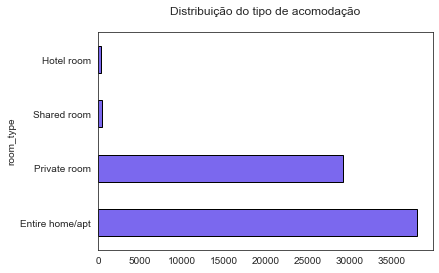

In [319]:
# Gráfico de barras

r_ab.plot(kind='barh', color= 'mediumslateblue', edgecolor='black', title='Distribuição do tipo de acomodação\n');

Observa-se pela tabela e o gráfico acima que os imóveis disponíveis no Airbnb se concentram nas modalidades 'entire home/apt' (55.88%) e 'private room' (42.90%).

#### Variável : Minimum_nights

In [13]:
#Gerando um intervalo de classes da variável minimum_nights com 50 divisões

airbnb['night_grupo'] = pd.cut(airbnb.minimum_nights, bins=50)

<ipython-input-13-78208c75ba70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['night_grupo'] = pd.cut(airbnb.minimum_nights, bins=50)


In [302]:
#Visualizando a frequência absoluta e a relativa por classe

m_grupo_ab = airbnb.groupby('night_grupo')['night_grupo'].count()
m_grupo_rel = ((airbnb.groupby('night_grupo')['night_grupo'].count())/airbnb.shape[0]).sort_values(ascending =False)
mtable = pd.DataFrame((m_grupo_ab,m_grupo_rel*100), index=['freq. abs','freq. rel (%)']).transpose().round(2)  

# Distribuição do nº de noite mínimas para reservar
print("\nDistribuição do nº de noite mínimas para reserva")
mtable


Distribuição do nº de noite mínimas para reserva


,freq. abs,freq. rel (%)
night_grupo,,
"(-0.124, 23.48]",65257.0,96.10
"(23.48, 45.96]",1388.0,2.04
"(45.96, 68.44]",212.0,0.31
"(68.44, 90.92]",519.0,0.76
"(90.92, 113.4]",82.0,0.12
"(113.4, 135.88]",50.0,0.07
"(135.88, 158.36]",21.0,0.03
"(158.36, 180.84]",69.0,0.10
"(180.84, 203.32]",34.0,0.05


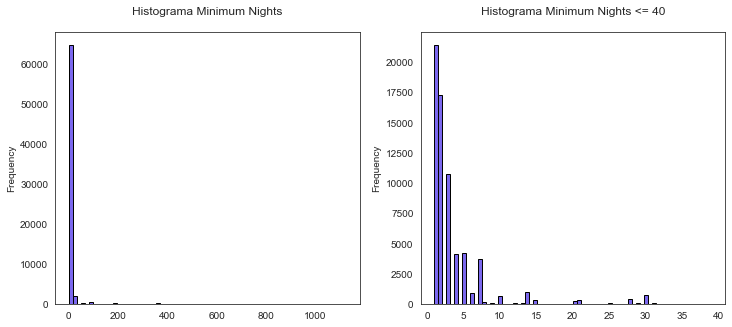

In [320]:
# Histograma da variável Minimum_nights

plt.figure(figsize=(12, 5))

# Minimum Nights
plt.subplot(121)
airbnb['minimum_nights'].plot(kind ='hist', color='mediumslateblue', edgecolor='black', bins=70, title='Histograma Minimum Nights\n');
#Minimum Nights <= 40
plt.subplot(122)
airbnb['minimum_nights'][(df.minimum_nights > 0) & (df.minimum_nights < 40)].plot(kind ='hist', color='mediumslateblue', edgecolor='black', bins=70, title='Histograma Minimum Nights <= 40\n');


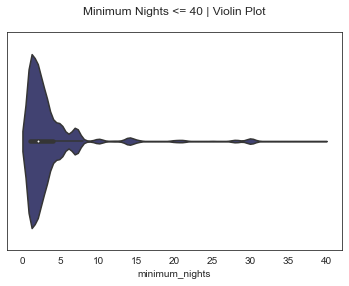

In [321]:
# Violin plot

sns.violinplot(x="minimum_nights", data=airbnb[airbnb.minimum_nights < 40],
                    scale="width", palette='tab20b')
plt.title('Minimum Nights <= 40 | Violin Plot\n');

Nota-se pela tabela de frequência que 65257 (96.10%) das reservas feitas no Airbnb são para número de noites mínimas entre 1 e 23. Observa-se pelo histograma  e pelo violinplot que o número de noites mínimas das reservas se concentram abaixo de 10 noites.

In [17]:
# Medidas estatísticas da variável minimum_nights

airbnb.minimum_nights.describe().round(2)

count    67903.00
mean         6.52
std         30.05
min          1.00
25%          1.00
50%          2.00
75%          4.00
max       1125.00
Name: minimum_nights, dtype: float64

In [305]:
# Moda, Variância e Percentil (99%)

print(f'Moda: {airbnb.minimum_nights.mode()[0]}')
print(f'Variância: {airbnb.minimum_nights.var():.2f}')
print(f'Percentil 99%: {np.percentile(airbnb.minimum_nights, 99).round(2)}')

Moda: 1
Variância: 902.95
Percentil 99%: 90.0


Pelas medidas estatísticas mostradas acima é possível notar que o número de noites mínimas das reservas têm:

* média: 6.52 noites
* mediana: 2 noites
* moda: 1 noite


* 25% das reservas pedem no mínimo 1 diária
* 50% das reservas variam entre 1 e 2 diárias mínimas
* 75% das reservas variam entre 1 e 4 diárias mínimas


* 99% das reservas variam entre 1 e 90 diárias mínimas, mostrando que apenas 1% das reservas pedem diárias acima de 90 dias, como o valor máximo de 1125 noites mínimas.

#### Variável : Price

Preço em libras (£)

In [19]:
#Gerando um intervalo de classes da variável price com 50 divisões

airbnb['price_grupo'] = pd.cut(airbnb['price'], bins=50)

<ipython-input-19-cf2ec95e7491>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['price_grupo'] = pd.cut(airbnb['price'], bins=50)


In [308]:
#Visualizando a frequência absoluta e a relativa por classe

p_grupo_ab = airbnb.groupby('price_grupo')['price_grupo'].count()
p_grupo_rel = ((airbnb.groupby('price_grupo')['price_grupo'].count())/airbnb.shape[0]).sort_values(ascending =False)
ptable = pd.DataFrame((p_grupo_ab,p_grupo_rel*100), index=['freq. abs','freq. rel (%)']).transpose().round(2)  

# Distribuição do nº de noite mínimas para reservar
print("\nDistribuição do preço da reserva")
ptable


Distribuição do preço da reserva


,freq. abs,freq. rel (%)
price_grupo,,
"(-18.012, 360.24]",64181.0,94.52
"(360.24, 720.48]",2335.0,3.44
"(720.48, 1080.72]",588.0,0.87
"(1080.72, 1440.96]",115.0,0.17
"(1440.96, 1801.2]",504.0,0.74
"(1801.2, 2161.44]",37.0,0.05
"(2161.44, 2521.68]",11.0,0.02
"(2521.68, 2881.92]",7.0,0.01
"(2881.92, 3242.16]",74.0,0.11


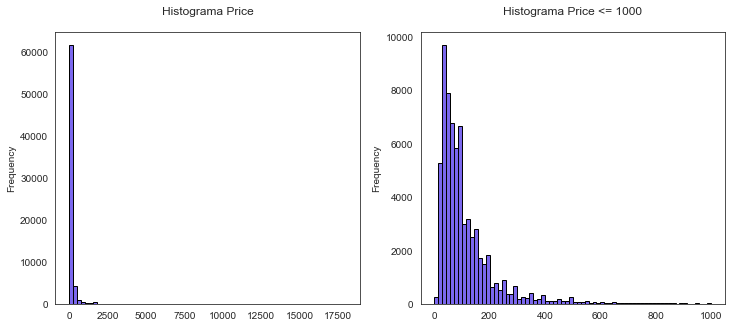

In [322]:
# Histograma da variável Price

plt.figure(figsize=(12, 5))

# Price
plt.subplot(121)
airbnb['price'].plot(kind ='hist', color='mediumslateblue', edgecolor='black', bins=70, title='Histograma Price\n')

#Price <= 1000
plt.subplot(122)
airbnb['price'][(df.price > 0) & (df.price < 1000)].plot(kind ='hist', color='mediumslateblue', edgecolor='black', bins=70, title='Histograma Price <= 1000\n');


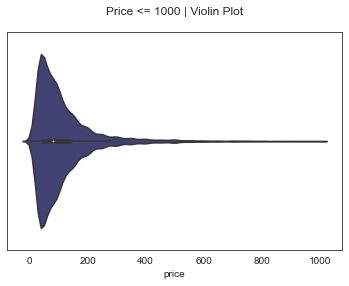

In [323]:
# Violin plot Price < 1000

sns.violinplot(x="price", data=airbnb[airbnb.price < 1000],
                    scale="width", palette="tab20b")
plt.title('Price <= 1000 | Violin Plot\n');

De todas as reservas feitas no Airbnb um total de 64181 (94.52%) têm o valor menor ou igual a 360 libras e 2335 (3.44%) das reservas  estão entre 360 e 720 libras. Pelo histograma e pelo violinplot é possível notar que os valores das reservas estão concentradas em valores abaixo de 300 libras. 

In [32]:
# Medidas estatísticas da variável price

airbnb.price.describe().round(2)

count    67903.00
mean       139.98
std        300.62
min          0.00
25%         45.00
50%         80.00
75%        142.00
max      18012.00
Name: price, dtype: float64

In [310]:
# Moda, Variância e Percentil (99%)

print(f'Moda: {airbnb.price.mode()[0]}')
print(f'Variância: {airbnb.price.var():.2f}')
print(f'Percentil 99%: {np.percentile(airbnb.price, 99).round(2)}')

Moda: 50
Variância: 90370.02
Percentil 99%: 1476.78


Pelas medidas estatísticas mostradas acima é possível observar que o preço da estadia, em libras, tem aproximadamente:

* média: 139 libras
* mediana: 80 libras
* moda: 50 libras


* 25% das reservas apresentam um valor de estadia menor ou igual a 45 libras
* 50% das reservas apresentam um valor de estadia menor ou igual a 80 libras
* 75% das reservas apresentam um valor de estadio menor ou igual a 142 libras


* 99% das reservas apresentam valores menores ou iguais a 1476 libras mostrando que apenas 1% das reservas pedem valores acima de 1476 libras, como o valor máximo de 18012 libras.


Apesar do dataset apresentar valores excêntricos como o nº de diárias mínimas de 1125 e o preço de diária de 18012 libras, o objetivo desta análise exploratória não é avaliar os outliers. Para isso, seria necessário uma investigação mais aprofundada a fim de verificar se os valores máximos apresentados são de fato outliers ou não.

### 4. Relacionamento entre as variáveis

#### Price x Room Type

In [131]:
# Agrupando o tipo de acomodação em relação à média dos preços das estadias

price_room = airbnb.groupby('room_type')['price'].mean().round(2)
price_room

room_type
Entire home/apt    183.23
Hotel room         176.27
Private room        84.22
Shared room         76.08
Name: price, dtype: float64

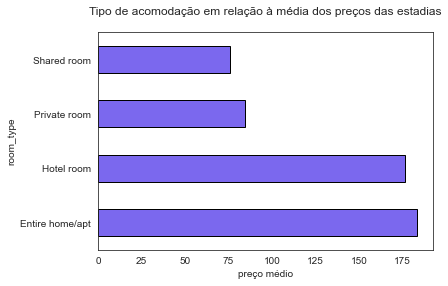

In [317]:
# Gráfico de barras

price_room.plot(kind='barh', edgecolor='black', color='mediumslateblue', title='Tipo de acomodação em relação à média dos preços das estadias\n')
plt.xlabel('preço médio');

Pode-se observar que 'Entire home/apt' têm um preço médio para reserva em torno de 183.23 libras. O 'Hotel room' aparece em segundo com preço médio de estadia de aproximadamente 176.27 libras. O 'private room' tem um preço médio de 84.22 libras, e o 'shared room' de 76.08 libras

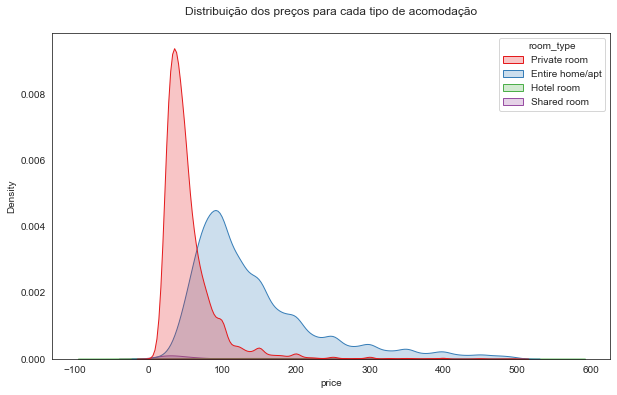

In [234]:
# Gráfico de densidade

plt.figure(figsize=(10,6))
sns.kdeplot(data=airbnb[airbnb.price < 500], x="price", hue="room_type", fill=True, palette='Set1')
plt.title('Distribuição dos preços para cada tipo de acomodação\n');

O gráfico de densidade mostra como os preços estão distribuídos para cada tipo de acomodação.

#### Price x Neighbourhood 

#### - Quais os 10 Bairros de Londres mais caros para reservar no Airbnb ?

In [162]:
# Agrupando os bairros em relação à média dos preços das estadias

price_nbh = airbnb.groupby('neighbourhood')['price'].mean().round(2).sort_values(ascending =False)
print('\n Top 10 Bairros de Londres mais caros para reservar no Airbnb')
price_nbh.head(10)


 Top 10 Bairros de Londres mais caros para reservar no Airbnb


neighbourhood
Westminster               248.77
City of London            241.04
Kensington and Chelsea    209.91
Southwark                 175.35
Camden                    156.06
Islington                 143.30
Hammersmith and Fulham    141.77
Richmond upon Thames      137.45
Greenwich                 136.06
Wandsworth                133.31
Name: price, dtype: float64

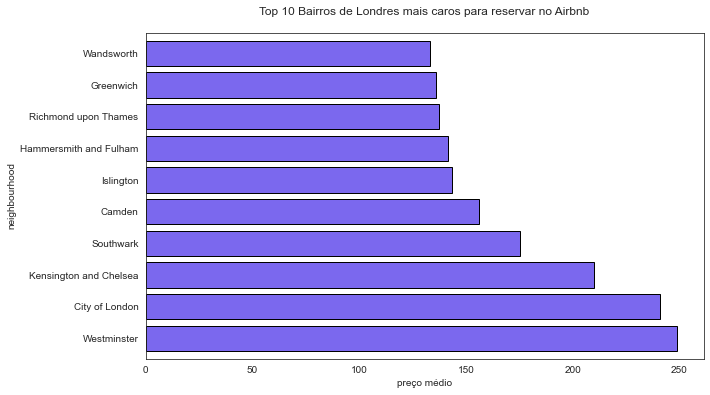

In [313]:
#Gráfico de barras

plt.figure(figsize=(10,6))
price_nbh.head(10).plot(kind='barh', width=0.8, edgecolor='black', color='mediumslateblue', title='Top 10 Bairros de Londres mais caros para reservar no Airbnb\n')
plt.xlabel('preço médio');

#### - Quais os 10 Bairros de Londres mais baratos para reservar no Airbnb ?

In [315]:
print('\n Top 10 Bairros de Londres mais baratos para reservar no Airbnb')
price_nbh.tail(10).sort_values()


 Top 10 Bairros de Londres mais baratos para reservar no Airbnb


neighbourhood
Croydon                 67.55
Bexley                  67.71
Enfield                 72.53
Waltham Forest          75.44
Barking and Dagenham    76.23
Harrow                  77.50
Sutton                  77.96
Bromley                 79.12
Redbridge               79.78
Havering                83.25
Name: price, dtype: float64

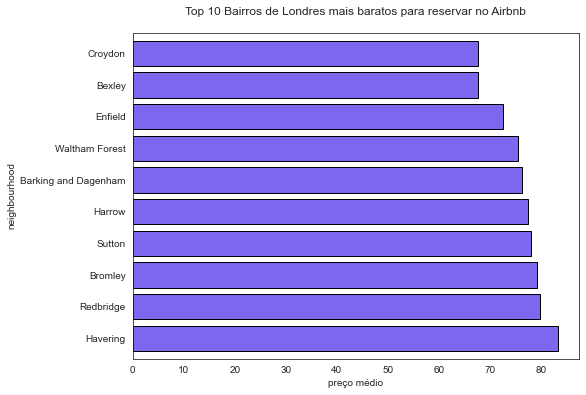

In [316]:
#Gráfico de barras

plt.figure(figsize=(8,6))
price_nbh.tail(10).plot(kind='barh', width=0.8, edgecolor='black', color='mediumslateblue', title='Top 10 Bairros de Londres mais baratos para reservar no Airbnb\n')
plt.xlabel('preço médio');

###  5. Análise Geográfica

Análise do comportamento das variáveis ```price```, ```neighbourhood``` e ```room_type``` através das coordenadas latitude e longitude fornecidas no dataset.

Avaliou-se as variáveis em um cenário de preço de diária abaixo de 100 libras. 

#### Variável: Price 

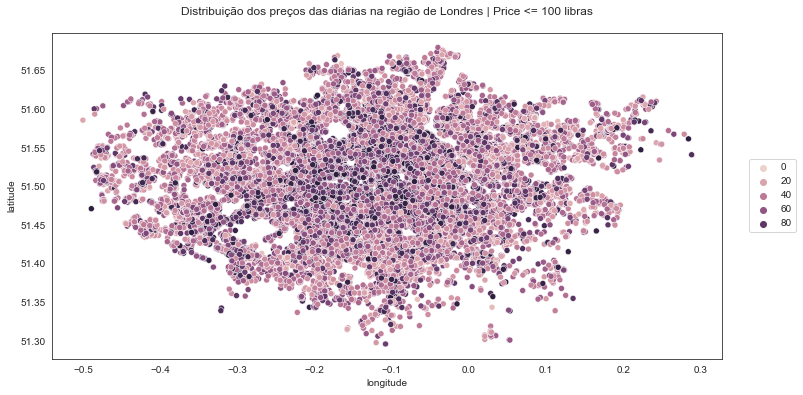

In [324]:
plt.figure(figsize=(12,6))

sns.scatterplot(x='longitude',y='latitude',hue='price', data=airbnb[airbnb.price < 100])
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.title('Distribuição dos preços das diárias na região de Londres | Price <= 100 libras\n')
plt.savefig('geo_price.png');

#### Variável: Neighbourhood

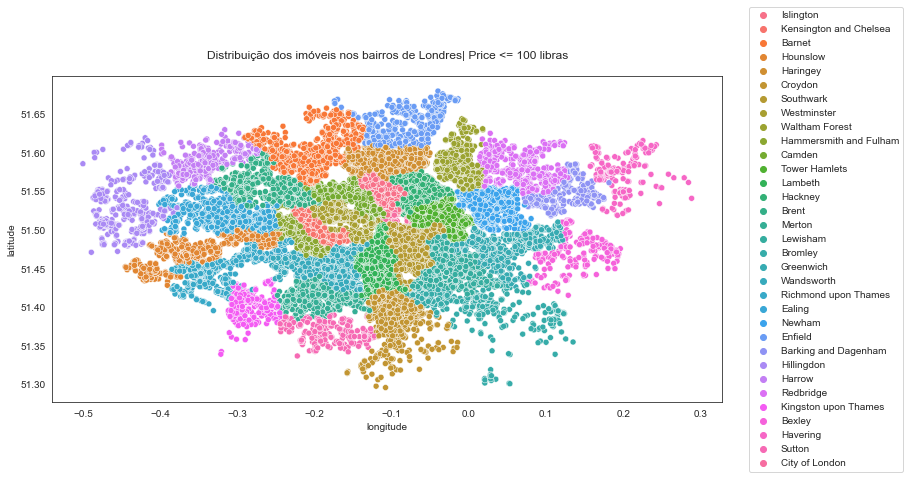

In [325]:
plt.figure(figsize=(12,6))

sns.scatterplot(x='longitude',y='latitude',hue='neighbourhood', data=airbnb[airbnb.price < 100])
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.title('Distribuição dos imóveis nos bairros de Londres| Price <= 100 libras\n')
plt.savefig('geo_neighbourhood.png');

#### Variável: Room_type 

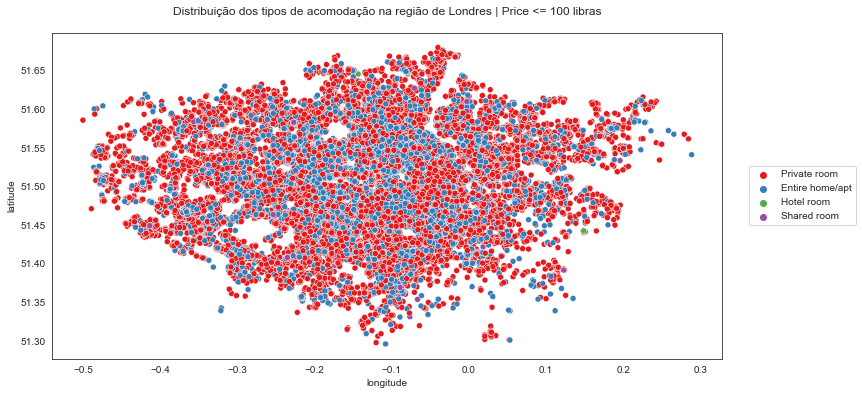

In [326]:
plt.figure(figsize=(12,6))

sns.scatterplot(x='longitude',y='latitude',hue='room_type', data=airbnb[airbnb.price < 100], palette='Set1')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.title('Distribuição dos tipos de acomodação na região de Londres | Price <= 100 libras\n')
plt.savefig('geo_roomtype.png');

### 6. WordCloud

O wordcloud é uma representação visual que mostra as palavras que apareceram com maior frequência no dataset.

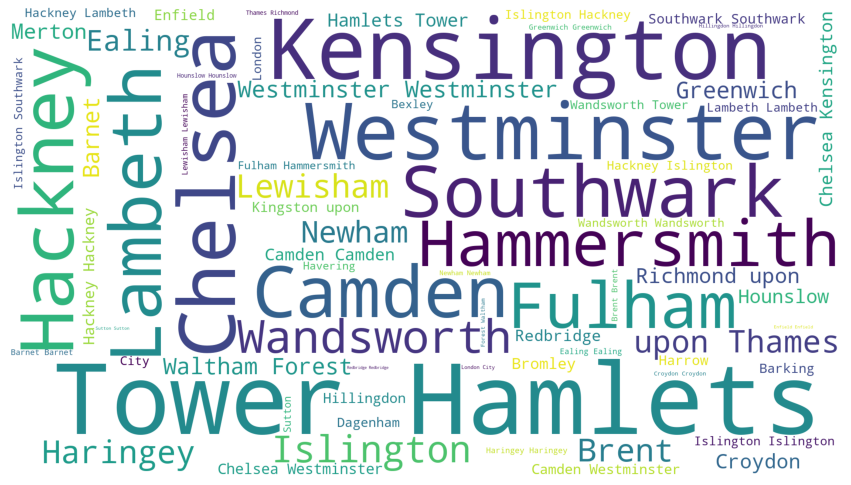

In [327]:
# WordCloud da Variável Neighbourhood

from wordcloud import WordCloud

plt.subplots(figsize=(15,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')

plt.show()